In [1]:
import pandas as pd
  # 데이터 처리 모듈

import numpy as np
import math
import missingno as msno
from scipy.stats import norm
  # 행렬, 선형대수 등 통계 연산 모듈

from google.colab import drive
drive.mount("/content/drive")

import seaborn as sns 
import matplotlib.pyplot as plt
  # 데이터 시각화 모듈

from typing import *
  # 타입 어노테이션 모듈(dynamic -> static)

from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.feature_selection import *
from sklearn.impute import *

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor

# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

Mounted at /content/drive


### 1.데이터 분석 문제의 소재

* 온라인 커머스 플랫폼 DS로 취직한 당신의 첫 프로젝트
* 작년 대히트였던 배송비 무료 쿠폰 이벤트 시즌2 진행
* 비상장기업이었던 작년과 달리 올해는 IPO공개 후 상장하여 좀 더 스마트하게 쿠폰을 뿌리고자 하는 경영진
* 어떻게 쿠폰을 지급하고 이벤트를 진행할 것인가.

### 2.SY's Q.

* **진정으로 흥미롭고 다른 사람들에게 가치를 더할 것이라고 생각하는 것인지 확인하는 것**
* 나이, 성별, 지역에 따른 군집 사이에 checkout, monthly_spend, shipping_fee, coupon, subscriber변수에 대한 통계적으로 유의미한 차이가 있는지 검토

| 고객 | 비회원(guest) / 일반 회원, 연간(유료)회원으로 구매 가능 |  |
| --- | --- | --- |
|  | 연간 회원(subscriber) | 무조건 배송비 무료 |
|  | 비회원(guest) / 일반 회원 | 일정 금액 이상 구매 시 배송비 무료 |
| 배송비 무료 금액 | 배송지역에 따라 다름 | 도서산간 / 해외 등 |
| 해외 배송비 | 배송량에 따라 상이 |  |
| 배송비 무료 쿠폰 정책 | 배송비가 있고 배송비 무료 쿠폰을 보유한 경우 자동 적용 후 소멸 | 1회만 사용가능 |

| feature | type | details |
| --- | --- | --- |
| age | integer | 행사 당시 유저 나이 |
| basket | float | 장바구니 총액(단위:천 원) |
| checkout | boolean(TF) | 결제(최종 구매) 여부 |
| region | string(object) | 배송지역 코드 |
| coupon | boolean | 배송비 무료 쿠폰 보유 여부 |
| gender | string | 유저성별 M F |
| monthly_spend | float | 행사 당시 월평균 결제금액(단위: 천 원) |
| shipping_fee | float | 배송비 |
| subscriber | boolean | 연간 회원 여부 |
| tenure | integer | 행사 당시 유저 가입 기간(단위: 월) |

* 출처 : 
  
  https://github.com/JaydenRyou/Manual-Implementation-of-K-Means-Clustering-Algorithm

  https://github.com/tofti/python-kmeans/blob/master/kmeans.py

  https://github.com/turnerluke/ML-algos/blob/main/k_means/k_means.py

In [ ]:
# 군집분석 with 사이킷런

'''
scaler = StandardScaler().fit(dataframe)
dataframe_scaled = scaler.transform(dataframe)

Kmeans = KMeans(
  n_clusters = 3,
  init = "random",
  max_iter = 300,
  n_init = 10,
  random_state = 2023
)

y_Kmeans = Kmeans.fit_predict(dataframe_scaled)
'''

'''
def outer_function(func):  # 기능을 추가할 함수를 인자로 받고,

    def inner_function(*args, **kwargs):  # 여기서 func 함수에서 받을 인자를 정의.
        return func(*args, **kwargs)

    return inner_func
'''

In [ ]:
# 군집분석 with for loop
# 과연 최적의 k값을 어떻게 찾을 것인가
# 데이터 포인트와 소속 클러스터의 중심값 사이의 거리 합을 최소화하는 기준


# 1. 데이터에서 임의의 k점을, 초기화 클러스터 중심으로 선택 : initializing the centroids
# 2. 모든 점에서 k클러스터 중심값으로부터의 거리를 계산(거리: 유클리디안) : assigning data points to clusters
def L2distance(xi, xj):
  return sum((xi - xj)**2) / len(xi)

def groupCenter(x):
  x = np.array(x)
  return x.mean(axis = 0)


# 3. 모든 점이 가장 근접한 클러스터 중심에 할당된 다음 산술평균을 활용하여 클러스터 중심값을 다시 산출 : assigning data points to clusters
def KmeansClustering(x, k, seed: int = 2023, iterable_num: int = 25):
  logs: List = []
  np.random.seed(seed)
  centers = x[
      np.random.choice(
          len(x),
          size = k,
          replace = False
      )
        # X벡터의 길이, 군집의 개수 k, 비복원추출
  ] 
    # x벡터 넘파이 배열의 "리스트 컴프리핸션으로 선언한 인덱스" 번호에 해당하는 원소를 중심값으로 선언
  
  for it in range(iterable_num):
    group: tuple = {}

    for index in range(k):
      group[index]: List = []

  # 데이터마다 근접한 클러스터 중심값 탐색
    for row in x:
      temp: List = []
      for index in range(k):
        temp.append(L2distance(centers[index], row))
          # 함수 적용
      group[np.argmin(temp)].append(row.tolist())

    for index in range(k):
      group_temp = np.array(group[index])
      group_temp = np.c_[
          group_temp, 
          np.full(len(group_temp), index)
      ]
      if index == 0:
        grouped = group_temp
      else:
        grouped = np.append(
            grouped, group_temp, axis = 0
        )

    # 중심값을 centers_new 리스트에 update
      centers_new: List = []
      for index in range(k):
        centers_new.append(groupCenter(group[index]).tolist())
          # 함수 적용
      centers_new = np.array(centers_new)

      # if updated center == center, break
      if np.sum(centers - centers_new) == 0:
        break
      else:
        centers = centers_new
        logs.append(grouped)
          
  return grouped, logs, it

In [ ]:
class Clustering():

  def __init__(self, n_cluster: int, 
               data_commerce = None, data_current_users = None,
               centroid = None, cluster = None):
    self.n_cluster = n_cluster
    self.data_commerce = data_commerce
    self.data_current_users = data_current_users
    self.centroid = centroid
    self.cluster = cluster
      
  
  def importData(self, path_data_commerce: str, path_data_current_users: str):
    data_commerce = pd.read_csv(
        path_data_commerce, 
        index_col = False,
        na_values = "NaN"
    )
      # "/content/drive/MyDrive/HanaFinanceDT/gooppang.csv"
    data_current_users = pd.read_csv(
        path_data_current_users,
        index_col = False,
        na_values = "NaN"
    )
      # "/content/drive/MyDrive/HanaFinanceDT/current_users.csv"
    
    data_commerce["gender"] = np.where(data_commerce["gender"] == "f", 1, 0)
      # 1이면 여성, 0이면 남성

    print(data_commerce.info())
    print(data_current_users.info())

    print(data_commerce.groupby(["subscriber"]).size())
    print(data_commerce.groupby(["checkout"]).size())
      # age, region, gender 변수와 
      # monthly_spend, subscriber, checkout, tenure 변수 사이에 패턴이 있는지 EDA
    
    self.data_commerce = data_commerce
    self.data_current_users = data_current_users


  def euclidean(self, point, data):
    return np.sqrt(
        np.sum( (point - data)**2, axis = 1)
    )
      # point와 data의 차이? point는 random sample?


  def fit(self, X_train):
    self.centorids = [np.random.choice(X_train)]
      # Pick a random point from train data for first centroid
    for _ in range(self.n_clusters - 1):
      distance = np.sum(
          [euclidean(centroid, X_train) for centroid in self.centroids],
          axis = 0
      )
      distance /= np.sum(distance)
      new_centroid_index = np.random.choice(
          range( len(X_train) ), size = 1, p = distance
      )[0]
        # Indexed @ zero to get val, not array of value
      self.centroids += [ X_train[new_centroid_index] ]
      
##################################################################

# Elbow Method for finding the Optimal Number of Cluster in Kmeans
# Select the number of clusters for the dataset : K
# Within Cluster Sum of Square(WCSS)
  @property
  def calculateCost(self, X, centroid, cluster):
    sum: int = 0
    for index, value in enumerate(X):
      sum += np.sqrt(
          ( centroid[int(cluster[index]), 0] - value[0] )**2 + \
          ( centroid[int(cluster[index]), 1] - value[1] )**2
      )
        # euclidean distance
    
    return sum
      # https://python-doc.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8A%A4%ED%83%9C%ED%8B%B1%EB%A9%94%EC%86%8C%EB%93%9C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0
  
  @property
  def Kmeans(self, data: pd.DataFrame, X, k: int):
    difference = 1
      # 모든 점에서 k클러스터 중심값으로부터의 거리(distance of the point form all centroids)
    cluster = np.zeros(X.shape[0])
    centroid = data.sample(n = k).values
      # Q&A
    
    while difference:
      for index, row in enumerate(X):
        mn_distance = float("inf")

        for idx, centroid in enumerate(centroid):
          similarity = np.sqrt(
              (centroid[0] - row[0])**2 + (centroid[1] - row[1])**2
          )
            # L2 거리유사도 정의

          if mn_distance > similarity:
            mn_distance = similarity
            cluster[index] = idx
          
          new_centroid = pd.DataFrame(X).groupby(
              by = cluster
          ).mean().values
      

          if np.count_nonzero(centroid - new_centroid) == 0:
            difference = 0
          else:
            centroid = new_centroid

      self.centroid = centroid
      self.cluster = cluster

    return self.centroid, self.cluster

  @Kmeans.setter
  @calculateCost.setter
  def elbowMethodFindK(self, data: pd.DataFrame, X, k: int):
    cost_list: List = []

    for k in range(1, 10, 1):
      centroids, cluster = Kmeans(data, X, k)
    cost = calculateCost(X, centroids, cluster)
    cost_list.append(cost)

연관규칙 마이닝

* 출처: https://hands-on.cloud/implementation-of-fp-growth-algorithm-using-python/

In [ ]:
# 신뢰도(confidence) = P(A∩B) / P(A)
# 지지도(support) = P(A∩B)
# 향상도(lift) = P(B|A) / P(B) = 지지도 / 신뢰도

### 3.기본적인 의문점 탐구 → 연습문제

* 배송지역별 배송료 무료 금액의 적용 전후?
* 쿠폰 적용 전후?
* 연간 회원은 무조건 무료? 아니면 배송비 적용 후 할인?
* 장바구니 총액(basket)은 배송비(shipping_fee)가 포함된 것인지?

그외의 다른 의문점은?

앞으로의 분석을 위한 불가피한 가정은?

출처
* https://towardsdatascience.com/implement-logistic-regression-with-l2-regularization-from-scratch-in-python-20bd4ee88a59


In [2]:
class ExplolatoryDataAnalysis():

  def __init__(self, data_commerce = None, data_current_users = None):
    self.data_commerce = data_commerce
    self.data_current_users = data_current_users
    
  
  def importData(self, path_data_commerce: str, path_data_current_users: str):
    data_commerce = pd.read_csv(
        path_data_commerce, 
        index_col = False,
        na_values = "NaN"
    )
      # "/content/drive/MyDrive/HanaFinanceDT/gooppang.csv"
    data_current_users = pd.read_csv(
        path_data_current_users,
        index_col = False,
        na_values = "NaN"
    )
      # "/content/drive/MyDrive/HanaFinanceDT/current_users.csv"
    
    data_commerce["gender"] = np.where(data_commerce["gender"] == "f", 1, 0)
      # 1이면 여성, 0이면 남성

    print(data_commerce.info())
    print(data_current_users.info())

    print(data_commerce.groupby(["subscriber"]).size())
    print(data_commerce.groupby(["checkout"]).size())
      # age, region, gender 변수와 
      # monthly_spend, subscriber, checkout, tenure 변수 사이에 패턴이 있는지 EDA
    
    self.data_commerce = data_commerce
    self.data_current_users = data_current_users
    return self.data_commerce, self.data_current_users
  
  def visualization(self):
    sns.relplot(
        x = "basket",
        y = "shipping_fee",
        col = "region",
        kind = "scatter",
        data = self.data_commerce
    )
      # 각 지역별 배송비와 장바구니에 담긴 상품의 금액 간 산점도

In [3]:
EDA = ExplolatoryDataAnalysis()

In [4]:
data_commerce, data_users = EDA.importData(
    path_data_commerce = "/content/drive/MyDrive/HanaFinanceDT/gooppang.csv",
    path_data_current_users = "/content/drive/MyDrive/HanaFinanceDT/current_users.csv"
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            60000 non-null  float64
 1   basket         60000 non-null  float64
 2   checkout       60000 non-null  bool   
 3   region         60000 non-null  object 
 4   coupon         60000 non-null  bool   
 5   gender         60000 non-null  int64  
 6   monthly_spend  60000 non-null  float64
 7   shipping_fee   60000 non-null  float64
 8   subscriber     60000 non-null  bool   
 9   tenure         60000 non-null  float64
dtypes: bool(3), float64(5), int64(1), object(1)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143000 entries, 0 to 142999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age            143000 non-null  float64
 1   region         143000 non-null  objec

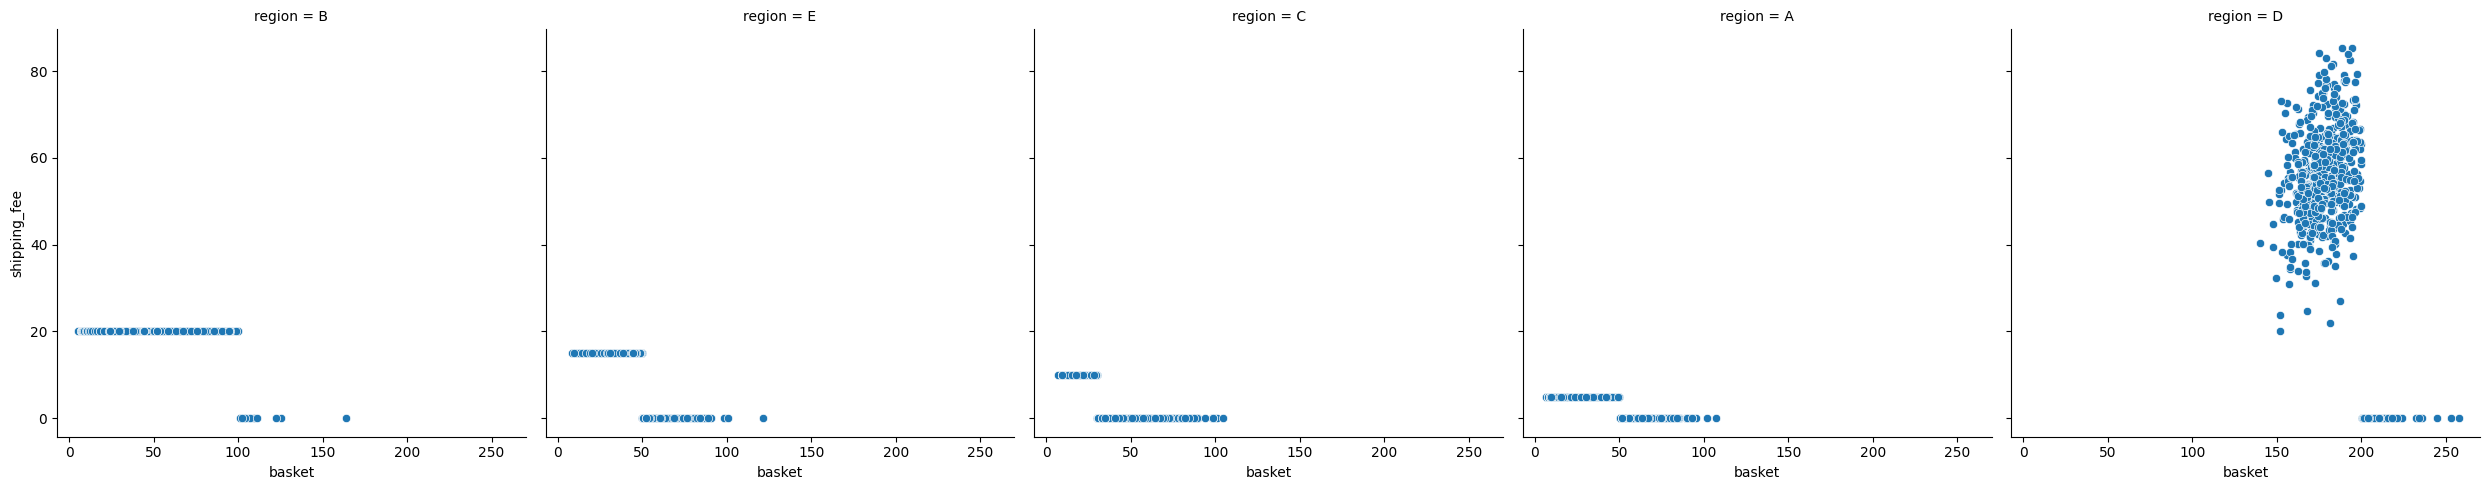

In [5]:
EDA.visualization()
  # 각 지역별 배송비와 장바구니에 담긴 상품의 금액 간 산점도
  # B region은 배송비 무료 threshold가 100인 것

In [6]:
(data_commerce.loc[
    lambda data: (data["shipping_fee"] > 0) & data["coupon"]
].shipping_fee > 0).any()
  # coupon을 받은 사람 중 배송비가 0이 아닌 사람이 있나? 있다

True

In [7]:
(data_commerce.loc[
    lambda data: data["subscriber"]
].shipping_fee > 0).any()
  # 연간 회원은 배송비가 무료인데, 해당 데이터에는 배송비 쿠폰이 적용되기 전으로 볼 수 있다
  # 실제 basket(X) 배송비 포함 상품가격을 결제한 금액이 아니라는 점에 유의한다

True

In [8]:
data_commerce.loc[
    lambda data: (~ data["coupon"]) & (~ data["subscriber"])
]
  # 쿠폰받은 사람과 구독자를 제외하고 나면 장바구니 크기와 배송비 간 상관관계가 문제가 된다(장바구니 금액에는 배송비가 포함되어 있지 않다고 가정)

,age,basket,checkout,region,coupon,gender,monthly_spend,shipping_fee,subscriber,tenure
1,41.0,40.9,False,B,False,0,118.34,20.0,False,2.0
2,30.0,41.5,False,B,False,1,144.90,20.0,False,31.0
4,42.0,24.6,False,B,False,0,91.32,20.0,False,5.0
5,28.0,20.1,False,B,False,1,78.76,20.0,False,10.0
6,47.0,37.4,False,E,False,1,104.86,15.0,False,2.0
...,...,...,...,...,...,...,...,...,...,...
59994,57.0,24.5,False,B,False,1,117.28,20.0,False,5.0
59995,34.0,28.2,False,C,False,1,101.73,10.0,False,2.0
59997,40.0,24.0,False,B,False,1,112.53,20.0,False,6.0
59998,52.0,37.6,False,B,False,0,129.42,20.0,False,8.0


```
    penalty : None or 'l2', default='l2'.
        Option to perform L2 regularization.
    C : float, default=0.1
        Inverse of regularization strength; must be a positive float. 
        Smaller values specify stronger regularization. 
```

In [ ]:
from xgboost.sklearn import XGBRFRegressor
class MachineLearner(ExplolatoryDataAnalysis):

  def __init__(self, data_commerce = None, data_current_users = None, 
               C = None, data_train = None, data_test = None):
    
    super().__init__(data_commerce, data_current_users)
    self.C = C
    self.data_train = data_train
    self.data_test = data_test
    

# 1. 구글 드라이브에서 코랩 IDLE으로 데이터 로드
  # def importData(self, path_data_commerce: str, path_data_current_users: str):  


# 2. 장바구니에 담은 상품을 고객이 결제할 확률(로그우도)
  def logitCheckout(self, categorical_list: List, numeric_list: List):

    self.data_train, self.data_test = train_test_split(
        self.data_commerce, 
        train_size = 0.8,
        random_state = 2023)
    checkout_columntransformer = ColumnTransformer(
        [
            ("bin", "passthrough", ["coupon", "subscriber"]),
            ("cat", OneHotEncoder(), categorical_list),
            ("num", StandardScaler(), numeric_list)
    ])
          # self.data_commerce.select_dtypes("category").column.tolist()
          # [bin] binary features
          # [cat] categorical features
          # [num] numeric features

    checkout_pipe = Pipeline(
        [
            ("transformer", checkout_columntransformer),
            ("classifier", LogisticRegression())
    ])

    checkout_grid_parameters = {
        "classifier__C" : np.logspace(-2, 2, 10)
    }
      # 추정기 이름과 파이프라인의 매개변수 사이에는 두 개의 밑줄이 있어야
    checkout_grid_search = GridSearchCV(
        checkout_pipe, 
        checkout_grid_parameters,
        scoring = "roc_auc",
        n_jobs = -1
    )
    regularizedLogit = checkout_grid_search.fit(
        X = self.data_train,
        y = self.data_train["checkout"])
    checkout_estimator = regularizedLogit.best_estimator_

  # 장바구니에 담은 상품을 고객이 결제할 확률(로그우도)
    data_test_with_coupon = self.data_test.assign(coupon = True)
    p_checkout_with_coupon = regularizedLogit.predict_proba(data_test_with_coupon)[:, 1]
  # 기댓값(data_test가 아닌 data_test_with_coupon)
    # data_test.basket * p_checkout_with_coupon
    # return p_checkout_with_coupon, (data_test.basket * p_checkout_with_coupon).mean()


# XGBboosting method 기반의 (분류와 회귀)
# 장바구니에 담은 상품을 고객이 결제할 확률(로그우도) 및
# 장바구니 내 상품 중 결제금액(전환)을 예측
  def XGB_checkoutBasket(self, categorical_list: List, numeric_list: List):

      self.data_train, self.data_test = train_test_split(
          self.data_commerce, 
          train_size = 0.8,
          random_state = 2023)
      
      checkout_columntransformer = ColumnTransformer(
          [
              ("bin", "passthrough", ["coupon", "subscriber"]),
              ("cat", OneHotEncoder(), categorical_list),
              ("num", StandardScaler(), numeric_list)
      ])
      checkout_pipe = Pipeline(
          [
              ("transformer", checkout_columntransformer),
              ("classifier", XGBClassifier())
      ])
      checkout_prediction = checkout_pipe.fit(self.data_train, y = self.data_test["checkout"])


      basket_columntransformer = ColumnTransformer(
          [
              ("bin", "passthrough", ["subscriber"]),
              ("cat", OneHotEncoder(), categorical_list),
              ("num", StandardScaler(), numeric_list)
      ])
      basket_pipe = Pipeline(
          [
              ("transformer", basket_columntransformer),
              ("classifier", XGBRegressor)
      ])
      basket_prediction = basket_pipe.fit(self.data_train)

      
      shippingfee_columntransformer = ColumnTransformer(
          [
              ("bin", "passthrough", ["subscriber"]),
              ("cat", OneHotEncoder(), ["region"]),
              ("num", StandardScaler(), ["basket"])
      ])
      shippingfee_pipe = Pipeline(
          [
              ("transformer", shippingfee_columntransformer),
              ("classifier", XGBRegressor)
      ])

"""
  # 예측한 데이터를 새로운 컬럼으로 생성하여 검증용 데이터에 저장
    self.data_train.assign(
      # 결제 여부에 대한 배송비 쿠폰의 ML 예측효과
        p_checkout_no_coupon = probability_checkout_no_coupon,
        p_checkout_with_coupon =  probability_checkout_with_coupon,
        coupon_effect = probability_checkout_with_coupon - probability_checkout_no_coupon,
          # ATE 인과관계분석의 일환
        
      # 연간회원의 경우 배송비가 무료이므로 배송비를 별도로 지급하지 않으나
      # 결제금액에 배송비를 포함하고 있으므로 이를 할인(discount) 반영한다. 
        basket = basket_pipe.predict,
          # 결제금액을 그라디언트 부스팅 회귀모형으로 예측한 값을 장바구니 컬럼으로 저장
        shipping_fee = shippingfee_pipe.predict,
        actual_shippingfee = lambda d: d.shipping_fee * (1 - d.subscriber)
          # ???
    )
"""




In [ ]:
ML = MachineLearner()
ML.importData(
    path_data_commerce = "/content/drive/MyDrive/HanaFinanceDT/gooppang.csv",
    path_data_current_users = "/content/drive/MyDrive/HanaFinanceDT/current_users.csv"
)
  # 타겟변수는 checkout(결제 여부)

In [ ]:
ML.PreprocessingSklearner(
    categorical_list = ["region", "gender"],
    numeric_list = ["age", "monthly_spend", "tenure"]
)

(array([0.10617512, 0.14004359, 0.1098989 , ..., 0.10964692, 0.07098639,
        0.15756422]),
 4.0058397853650485)

In [ ]:
class DIY(ExplolatoryDataAnalysis):
  
  def __init__(self, X, theta, y,
               data_commerce = None, data_current_users = None,
               class_probability = None, m = None):
    super().__init__(data_commerce, data_current_users)
    
    self.X = X
    self.theta = theta
    self.y = y

    self.class_probability = class_probability
    self.m = m


  def probability(self):
  # 입력값의 가중합 산출
    net_input = np.dot(self.X, self.theta)
  # 실제값에 매핑할 활성화 함수 : 시그모이드 함수
  # 시그모이드 함수를 적용하여 추정확률 반환
    class_probability = 1 / ( 1 + np.exp(-net_input) )
    self.class_probability = class_probability
    return self.class_probability


  def costFunction(self):
  # cost( h(x), y ) = -ylog( h(x) ) - (1-y)log(1-h(x^i))
    self.m = self.X.shape[0]
    total_cost = - (1/self.m) * np.sum(
        self.y * np.log(self.class_probability) + \
        (1 - self.y) * np.log(1 - self.class_probability)
    )
    return total_cost


  def gradientDescent(self, theta, X, y):
    gradient_function = 1/self.m * np.dot(self.X.dot, self.class_probability - self.y)
    return gradient_function


  def fit(self):
    optmized_weight = scipy.fmin_tnc(
        func = DIY().costFunction,
        x0 = self.theta,
        fprime = DIY().gradientDescent,
        args = (self.X, self.y.flatten())
    )

  # parameters = DIY().fit(self.X, self.y, self.theta)
  # def predict(self):

"""
    # Helper Function to update weights in gradient descent
    Y_pred = self.predict(self.X)
    dW = (
        -( 2 * (self.X.T).dot(self.Y - Y_pred) )
    )
    db = -2 * np.sum(self.Y - Y_pred) / self.m

    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    prediction = X.dot(self.W) + self.b

    return prediction
"""

### 4.우버 데이터 사이언티스트의 관점
* 배송비 무료 쿠폰의 효과
* 유용한 결과: 쿠폰 **`지급 전후`**의 각종 성과지표에 대한 예측  
* 필요한 모형: 다양한 **`성과지표에 대한 쿠폰의 효과`**(인과관계!)

* 어떤 형태로든 인과관계 분석은 피해갈 수 없다. 과학적으로 정확한 결과를 도출할 수 있는 경우는 극히 적지만, 생각보다 부정확한 결과도 유용할 때가 많다. 
* 최소한의 인과관계분석에 대한 이해와 내 결과의 오점은 알고 살자!

In [ ]:
data_train, data_test = train_test_split(
    data_commerce, train_size = 0.7, random_state = 2023
)
  # [data] ata_users
coupon_index = data_test.coupon
  # 쿠폰을 받은 고객이 받지 않은 고객 대비 구매율의 차이를 알고싶다

In [ ]:
checkout_with_coupon = data_test[coupon_index].checkout.mean()
checkout_no_coupon = data_test[~coupon_index].checkout.mean()
print(
    f"{round(checkout_with_coupon * 100, 4)}%, {round(checkout_no_coupon * 100, 4)}%"
)
  # 쿠폰을 받은 고객이 7%point 더 구매율이 높은 이유(단, 7%가 통계적으로 유의미하지 않은 우연한 결과일 수 있다)

11.6015%, 5.0748%


In [ ]:
basket_with_coupon = data_test[coupon_index].basket.mean()
basket_no_coupon = data_test[~coupon_index].basket.mean()
print(
    f"{round(basket_with_coupon * 100 - basket_no_coupon * 100, 4)}%"
)
  # 쿠폰을 받은 고객이 장바구니에 담긴 상품의 구매전환율이 9.5916%point 더 높은 이유

9.5916%


In [ ]:
class_probability, expectation_value = ML.PreprocessingSklearner(
    categorical_list = ["region", "gender"],
    numeric_list = ["age", "monthly_spend", "tenure"]
)

In [ ]:
coupon_id = np.array(coupon_index)

In [ ]:
predict_p_checkout_with_coupon = class_probability[coupon_id == True]
predict_p_checkout_no_coupon = class_probability[~coupon_id]

IndexError: ignored

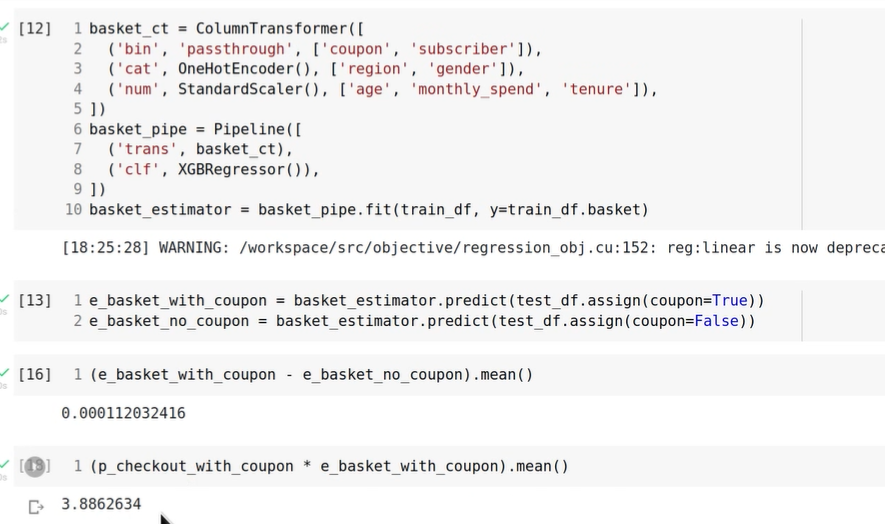